# Kussmaul-Martensen quadrature (also often called "Kress quadrature")

In [1]:
import numpy as np
import matplotlib.pyplot as pt

In [2]:
t = np.linspace(0, 2*np.pi, 300,endpoint=False)

## Setup

Let's make a curve and pick a target point:

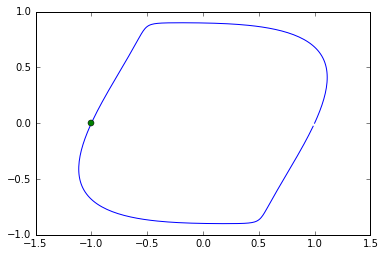

In [29]:
uncircleness = 1

path = np.array([
    np.cos(t) + uncircleness*0.2*np.sin(3*t),
    np.sin(t) + uncircleness*0.1*np.sin(3*t)
    ])

tgt_index = len(t)//2
tgt_t = t[tgt_index]
tgt = path[:, tgt_index]

pt.gca().set_aspect("equal")
pt.plot(path[0], path[1])
pt.plot(tgt[0], tgt[1], "o")

Get some derivatives of the curve:

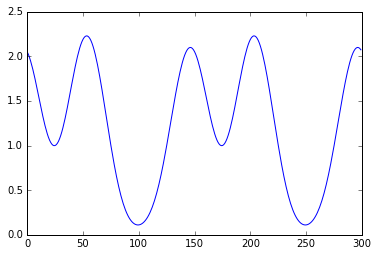

In [28]:
import scipy.fftpack as fft

dpath_dt = np.array([
    fft.diff(path[0]),
    fft.diff(path[1]),
    ])

dpdt_squared = dpath_dt[0]**2 + dpath_dt[1]**2
pt.plot(dpdt_squared)

Get normals to the curve:

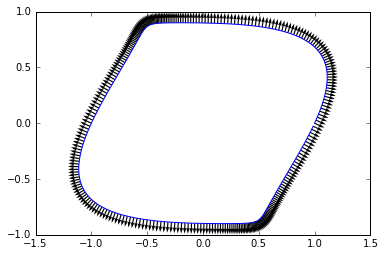

In [27]:
normals = np.array([
    dpath_dt[1],
    -dpath_dt[0]
    ]) / np.sqrt(dpdt_squared)

pt.plot(path[0], path[1])
pt.quiver(path[0], path[1], normals[0], normals[1])

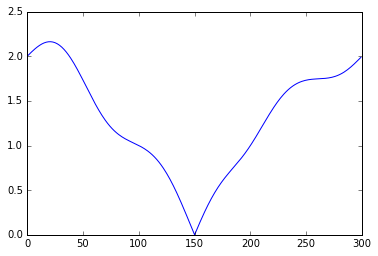

In [26]:
dist_vec = tgt[:, np.newaxis] - path

dist = np.sqrt(np.sum(dist_vec**2, axis=0))

pt.plot(dist)

## Single-layer potential

Let's look at the integrand for the SLP:

-c:2: RuntimeWarning: divide by zero encountered in true_divide


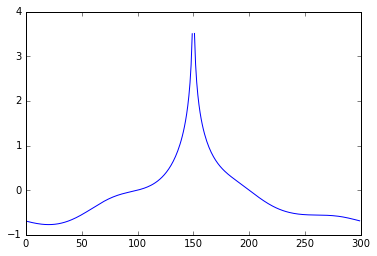

In [25]:
slp_integrand = np.log(1/dist)
pt.plot(slp_integrand)

Even if this is integrable--Gaussian quadrature will do a terrible job. **Why?**

-c:4: RuntimeWarning: divide by zero encountered in log


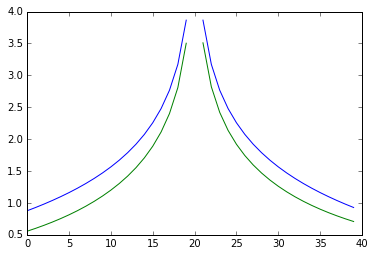

In [24]:
near_sing_slice = slice(tgt_index-20, tgt_index+20)

log_sin_squared = -0.5*np.log(4*np.sin((tgt_t - t)/2)**2)
pt.plot(log_sin_squared[near_sing_slice])
pt.plot(slp_integrand[near_sing_slice])

-c:2: RuntimeWarning: invalid value encountered in subtract


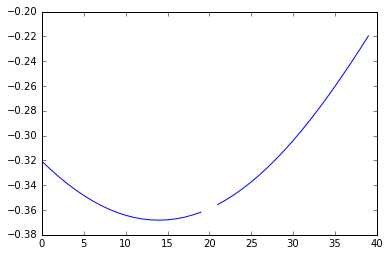

In [23]:
slp_subtracted = slp_integrand - log_sin_squared
pt.plot(slp_subtracted[near_sing_slice])

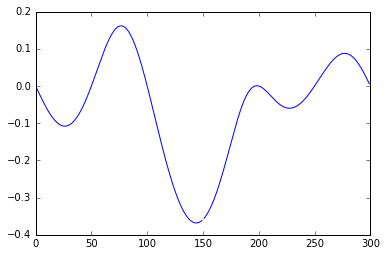

In [17]:
pt.plot(slp_subtracted)

**How does this help?**

### Double-layer potential

-c:2: RuntimeWarning: invalid value encountered in true_divide


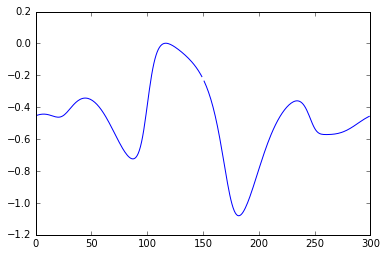

In [22]:
grad_slp = dist_vec/dist**2

dlp_integrand = np.sum(grad_slp * normals, axis=0)
pt.plot(dlp_integrand)

### S'

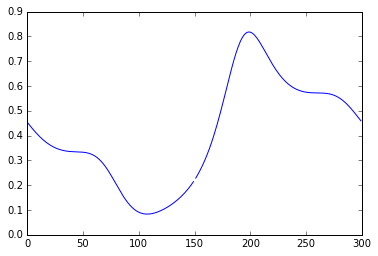

In [21]:
sp_integrand = np.sum(grad_slp * normals[:, tgt_index, np.newaxis], axis=0)
pt.plot(sp_integrand)

## Questions

* How would you apply this for **Helmholtz**?
* Name aspects that make this rule slightly **impractical**
* How would this apply to D'?